### Import dependencies

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read data

In [107]:
#df = pd.read_csv('suicide_detection_full_cleaned.csv')
df = pd.read_csv('suicide_detection_final_cleaned.csv')
df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


### Checking for data balancing

In [108]:
# ver articulo sobre este tema en:
# https://machinelearningmastery.com/what-is-imbalanced-classification/
df['class'].value_counts()

class
non-suicide    107066
suicide         67902
Name: count, dtype: int64

### As we can see from the count the data is imbalance there is 1.57 times more non-suicidal notes than notes that belong to suicide

### Converting the fields suicide and non-suicide to 0 and 1

In [9]:
df['class']=df['class'].apply(lambda x: 1 if x=='suicide' else 0)
df['cleaned_text'] = df['cleaned_text'].astype('U')
df.dtypes

text            object
class            int64
cleaned_text    object
dtype: object

## Import dependencies related to model training
#### Now I have to divide the data for training and testing, afterwards I need to vectorize the text

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['class'])

### In order to train the model One has to vectorize the data 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [112]:
# Training the model with the training data already vectorized
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() 
model.fit(X_train_count,y_train)

MultinomialNB()

### Testing the model againts the X_train, y_train

In [113]:
model.score(X_train_count, y_train)

0.9215856613780805

### Testing the model: X_test

In [115]:
X_test_count = v.transform(X_test)
X_test_count

<43742x63446 sparse matrix of type '<class 'numpy.int64'>'
	with 767726 stored elements in Compressed Sparse Row format>

In [116]:
## Checking the score of the model against test data
model.score(X_test_count, y_test)

0.9099721091856796

In [117]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Lets try some manual predictions to see how

In [118]:
text_test = ['I wanna die',
             'My life has no meaning', 
             'My next vacation trip will be awesome',
             'I enjoy everything, my family, my cats, my kids',
             'I love my dog',
             'What the fuck dude',
             'Why to continue living',
             'What happened to your mom, She died?',
             'I gotta go to work everyday and yet it feels like the right thing to do for happiness',
             'I am so hungry',
             'My wife is swimming in the pool'
             ]
# in order to pass text_test to the model it has to be vectorized
text_test_count = v.transform(text_test)
model.predict(text_test_count)

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

### Metrics analysis

#### All dependencies related to metrics


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss

In [120]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9099721091856796
precision_score: 0.849309918908759
recall_score:  0.9332035168466395
f1_score:  0.8892825011246064
roc_auc_score:  0.9142412434018605


In [121]:
confusion_matrix(y_test,y_pred)

array([[23989,  2806],
       [ 1132, 15815]], dtype=int64)

### Visualizing the confusion matrix

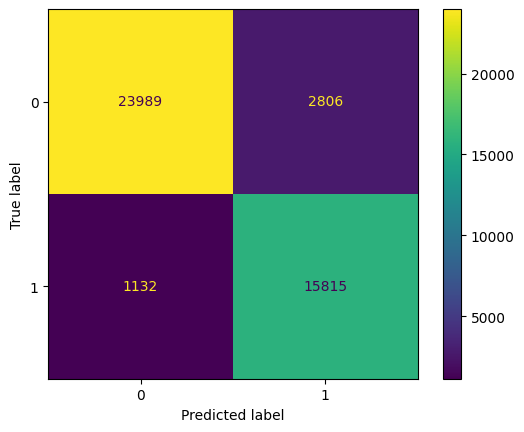

In [123]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

### Creating Data Balance  - Subsampling

In [124]:
df_0 = df[df['class']==0]
df_0.head()

,text,class,cleaned_text
1,Am I weird I don't get affected by compliments...,0,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,0,finally hear bad year swear fucking god annoying
10,Fuck the verizon smart family app I can’t even...,0,fuck verizon smart family app not watch porn p...
11,"Well, Im screwed. I locked myself in the schoo...",0,screw lock school toilet not edit live tell story
12,I'm fucked assignment is due tomorrow and I ha...,0,fuck assignment tomorrow not start


In [125]:
df_1 = df[df['class']==1]
df_1.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,1,ex wife threaten suiciderecently leave wife go...
3,i need helpjust help me im crying so hard,1,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,1,end tonight not anymore quit
5,I took the rest of my sleeping pills and my pa...,1,take rest sleeping pill painkillersi not wait ...
6,Can you imagine getting old? Me neither.Wrinkl...,1,imagine get old wrinkle weight gain hair loss ...


In [126]:
size = df_1['class'].size
size

67902

In [128]:
# Now I have to subsample the greater dataset to n = size of the smaller one
df_00 = df_0.sample(n=size, replace=False, random_state=0)
subsample_df = pd.concat([df_00, df_1])
# now the data is balanced by the subsampling method
subsample_df['class'].value_counts()

class
0    67902
1    67902
Name: count, dtype: int64

### Let's train the model again

In [129]:
X_train, X_test, y_train, y_test = train_test_split(subsample_df['cleaned_text'], subsample_df['class'])

In [130]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [131]:
model = MultinomialNB() 
model.fit(X_train_count,y_train)

MultinomialNB()

In [132]:
model.score(X_train_count, y_train)

0.9196292696336877

In [134]:
X_test_count = v.transform(X_test)
## Checking the score of the model against test data
model.score(X_test_count, y_test)

0.9081912167535566

In [135]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [136]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9081912167535566
precision_score: 0.8818819916648388
recall_score:  0.943502493399824
f1_score:  0.9116521640543068
roc_auc_score:  0.9080460532774584


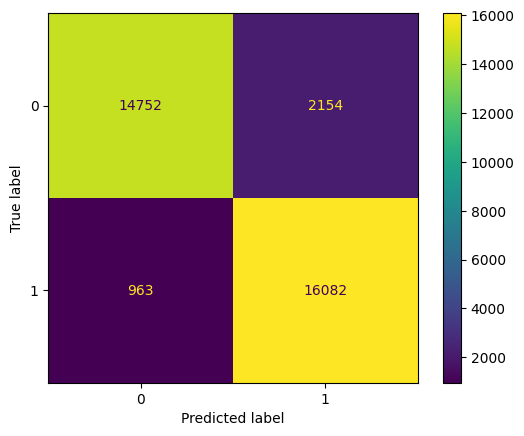

In [137]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [183]:
import pickle
with open('NB_Subsampling','wb') as f:
    pickle.dump(model,f)

### Creating Data Balance  - oversampling

In [4]:
import pandas as pd

In [8]:
#df = pd.read_csv('suicide_detection_full_cleaned.csv')
df = pd.read_csv('suicide_detection_final_cleaned.csv')
df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


In [10]:
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]

In [11]:
size = df_0['class'].size
size

107066

In [12]:
df_1 = df_1.sample(n=size, replace=True, random_state=0)
oversample_df = pd.concat([df_0, df_1])

In [13]:
# now the data is balanced by the subsampling method
oversample_df['class'].value_counts()

class
0    107066
1    107066
Name: count, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(oversample_df['cleaned_text'], oversample_df['class'])

In [19]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [144]:
model = MultinomialNB() 
model.fit(X_train_count,y_train)

MultinomialNB()

In [145]:
model.score(X_train_count, y_train)

0.9225898044197037

In [146]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9140343339622289

In [147]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [148]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9140343339622289
precision_score: 0.886253765851608
recall_score:  0.9491633525924814
f1_score:  0.9166304347826087
roc_auc_score:  0.9141813637846145


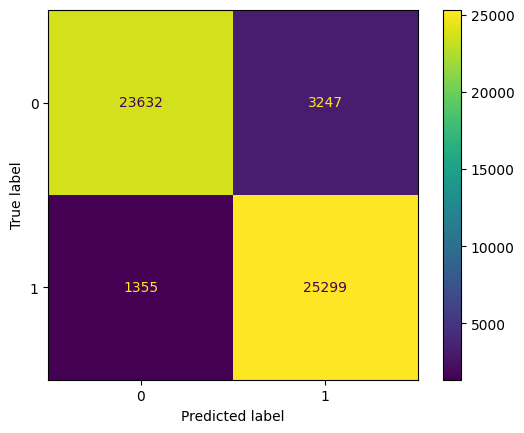

In [149]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

### Imbalance Data Naive Bayes hyperparameter tunning

In [184]:
with open('NB_Oversampling','wb') as f:
    pickle.dump(model,f)

In [157]:
print(MultinomialNB().get_params())
print(type(MultinomialNB().get_params()))

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
<class 'dict'>


In [168]:
param_grid_nb = {'alpha': [1.0], 'fit_prior': [True, False], 'force_alpha': [True,False]}

In [173]:
from sklearn.model_selection import GridSearchCV
model_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid_nb, scoring = 'precision', verbose=1, cv=10, n_jobs=-1)
model_grid.fit(X_train_count, y_train)
model_grid.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


MultinomialNB(fit_prior=False)

In [174]:
model_grid.score(X_train_count, y_train)

0.8971708251565275

In [175]:
X_test_count = v.transform(X_test)
model_grid.score(X_test_count, y_test)

0.8868936976116157

In [178]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred_grid = model_grid.predict(X_test_count)
y_pred_grid

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [180]:
print("accuracy: ", accuracy_score(y_test,y_pred_grid))
print("precision_score:", precision_score(y_test,y_pred_grid))
print("recall_score: ", recall_score(y_test,y_pred_grid))
print("f1_score: ", f1_score(y_test,y_pred_grid))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred_grid))

accuracy:  0.9142398146937403
precision_score: 0.8868936976116157
recall_score:  0.9487506565618669
f1_score:  0.9167799590334802
roc_auc_score:  0.9143842571845384


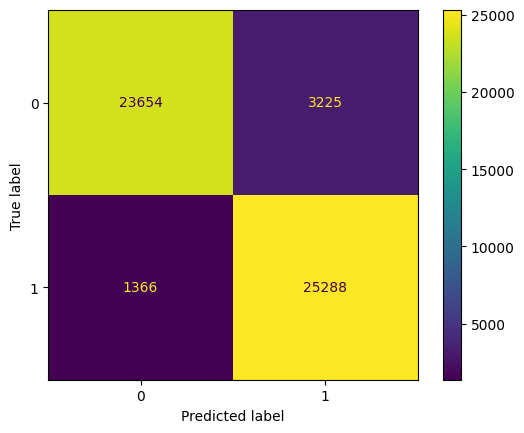

In [181]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [185]:
with open('NB_GridSearch','wb') as f:
    pickle.dump(model_grid,f)

### Oversampling Data Naive Bayes hyperparameter tunning

In [20]:
oversample_df['class'].value_counts()

class
0    107066
1    107066
Name: count, dtype: int64

In [21]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

In [64]:
model = MultinomialNB() 

In [65]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [66]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [67]:
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5)

### Cross validation metrics

In [70]:
print(f'CV Training Accuracy:  {round(scores["test_accuracy"].mean(),2)}')
print(f'CV Training Precision: {round(scores["test_precision_macro"].mean(),2)}')
print(f'CV Training Precision: {round(scores["test_recall_macro"].mean(),2)}')
print(f'CV Training Precision: {round(scores["test_f1_macro"].mean(),2)}')

CV Training Accuracy:  0.91
CV Training Precision: 0.92
CV Training Precision: 0.91
CV Training Precision: 0.91


In [71]:
model.fit(X_train_count, y_train)

MultinomialNB()

In [62]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [63]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9140156538957279
precision_score: 0.8864422774457377
recall_score:  0.9493187602934571
f1_score:  0.9168037305474723
roc_auc_score:  0.914082134369796
